# Dog Breed Classification
This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog.

## 2. Data
The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [ ]:
# Unzip the uploaded file from google drive
#!unzip "/content/drive/MyDrive/Dog Breed Classification/dog-breed-identification.zip" -d "drive/MyDrive/Dog Breed Classification"

### Get our Workspcae ready

In [ ]:
# import Tenserflow into colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YES)" if tf.config.list_physical_devices("GPU") else "Not available")

TF version: 2.6.0
TF Hub version: 0.12.0
GPU available (YES)


## Getting data ready(turning into Tensors)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Breed Classification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     8bef88134879b7794217700319b25561  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# how many images are there in each breed
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

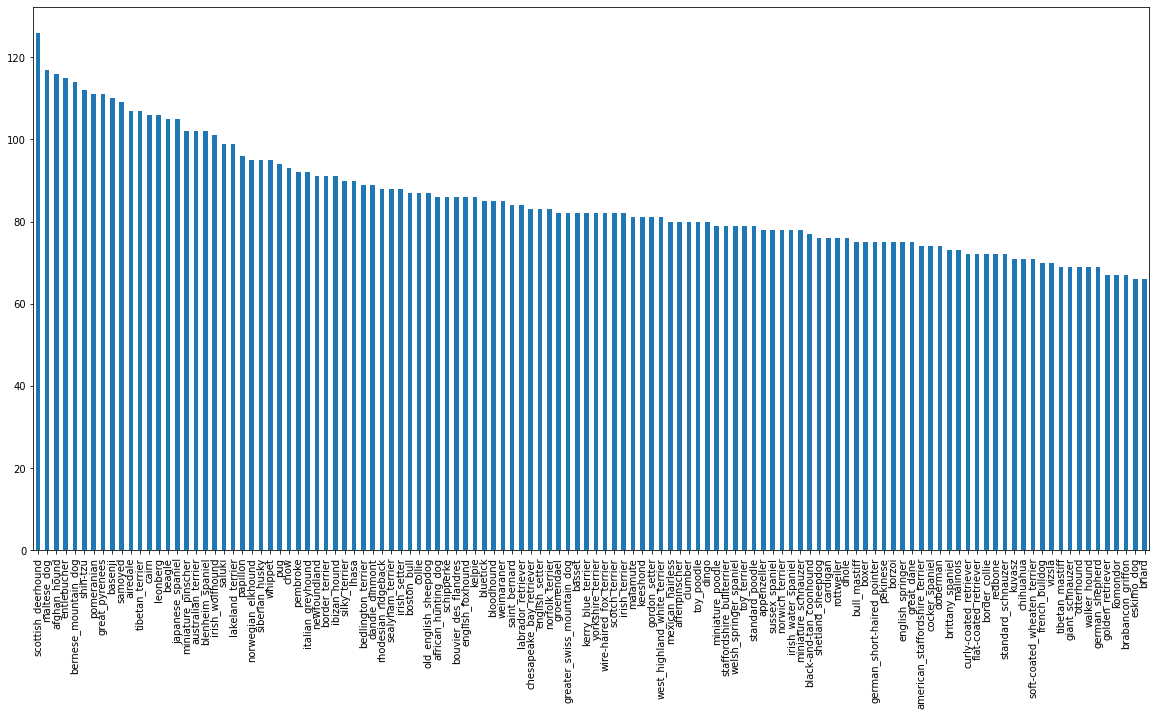

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

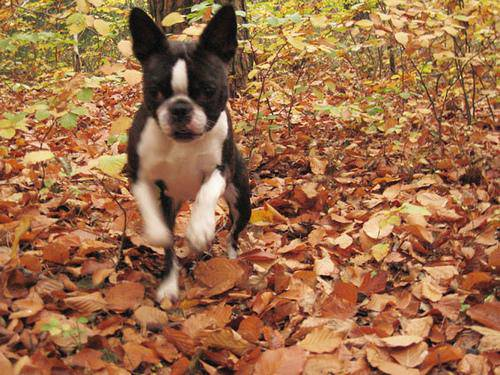

In [ ]:
# Let's view an image
from IPython.display import Image
Image("drive/MyDrive/Dog Breed Classification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their labels
let's get image filename

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create Pathnames from image ID's
filenames = ["drive/MyDrive/Dog Breed Classification/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog Breed Classification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Breed Classification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Breed Classification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Breed Classification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Breed Classification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Breed Classification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Breed Classification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Breed Classification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Breed Classification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Breed Classification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Breed Classification/train/")) == len(filenames):
  print("Filenames match actual amount of files")
else:
  print("Filenames does not match")

Filenames match actual amount of files


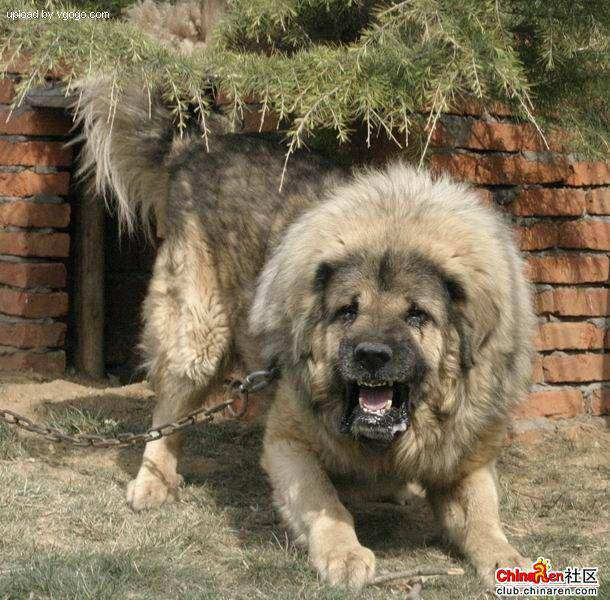

In [ ]:
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# Checking number of labels to the number of filenames
if len(labels) == len(filenames):
  print("Matches")
else:
  print("Not Matches")

Matches


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turn every label into boolean labels
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/MyDrive/Dog Breed Classification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Breed Classification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Breed Classification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Breed Classification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Breed Classification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Breed Classification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Breed Classification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Breed Classification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Breed Classification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Breed Classification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Creating our own validation set


In [ ]:
# Setup x and y variables
x = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step:100}


In [ ]:
# let's split the data into train and test
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
x_train[:2], y_train[:2]

(['drive/MyDrive/Dog Breed Classification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Breed Classification/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, Fal

## Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to 
write a function which does a few things:

1) Take an `image` filepath as input

2) Use TensorFlow to read the file and save it to a variable, `image`

3) Turn our `image` (a jpg) into Tensors

4) Normalize our `image` (convert color channel values from from 0-255 to 0-1).

5) Resize the `image` to be a shape of (224, 224)

6) Return the modified `image`

In [ ]:
# Convert image to numpy
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a functoin for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image filepath and turns the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical tensor with 3 colour channels
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value(224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning data into batches
Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: 
`(image, label)`.

In [ ]:
# Create a simple function to written a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image filepath name and the associated label,
  processes the image and returns a tuplr of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
(process_image(x[12]), tf.constant(y[12]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.41515437, 0.19946808, 0.1720171 ],
         [0.37869743, 0.17085429, 0.13948174],
         [0.36193058, 0.15503281, 0.12334514],
         ...,
         [0.29701486, 0.10125153, 0.07380054],
         [0.29280463, 0.10064777, 0.07319678],
         [0.29280463, 0.10064777, 0.07319678]],
 
        [[0.40806067, 0.19237438, 0.1649234 ],
         [0.40548262, 0.19763947, 0.1662669 ],
         [0.37599018, 0.16909242, 0.13740474],
         ...,
         [0.28789535, 0.0939433 , 0.06649231],
         [0.28233546, 0.09017858, 0.06272759],
         [0.28233546, 0.09017858, 0.06272759]],
 
        [[0.4370794 , 0.22139311, 0.19394213],
         [0.43267584, 0.2248327 , 0.19346014],
         [0.39105853, 0.18416077, 0.15247308],
         ...,
         [0.28235295, 0.09019608, 0.0627451 ],
         [0.2784314 , 0.08627451, 0.05882353],
         [0.2784314 , 0.08627451, 0.05882353]],
 
        ...,
 
        [[0.14872189, 0.06765511

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`x` & `y`) into batches!



In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn the data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label(y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  also accepts test data as input(no labels).
  """
  # If the data is test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data batches..")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    # shuffling 
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Creating training and validation batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches..
Creating validation data batches..


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

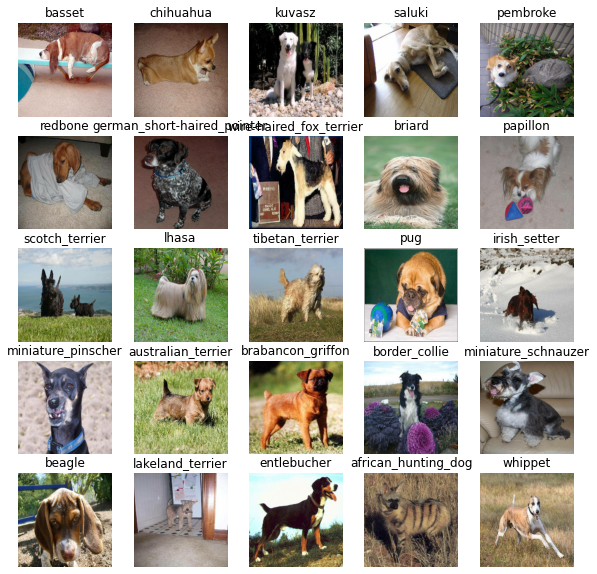

In [ ]:
# Now let's visualize the data in the batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

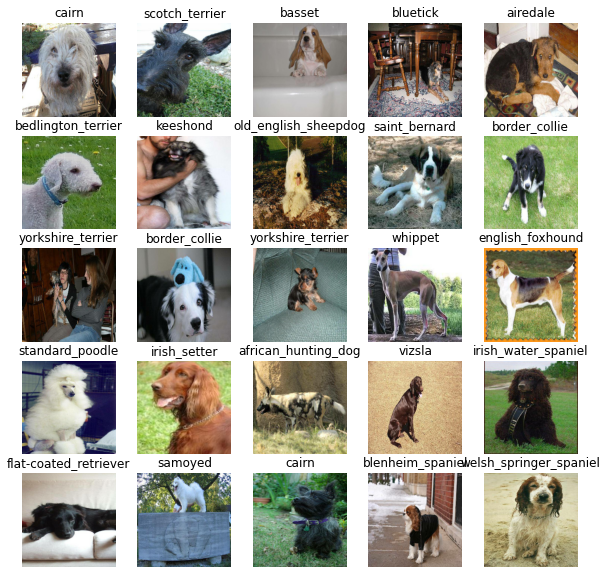

In [ ]:
# Now let's visualize validation sets
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:

* The input shape (our images shape, in the form of Tensors) to our model.

* The output shape (image labels, in the form of Tensors) of our model.

* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup the output shape to the model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax")
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)
  
  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

#### TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅
3. Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard call back
def create_tenserboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog Breed Classification/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping Callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model(on subset of data)


In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100}

Let's create a function which trains a model.

* Create a model using create_model()
* Setup a TensorBoard callback using      create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train a model and returned a model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train amodel
  tensorboard = create_tenserboard_callback()

  # Fit the model
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [ ]:
# Fit the model to data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 124s 4s/step - loss: 4.6246 - accuracy: 0.0825 - val_loss: 3.4172 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 4s 176ms/step - loss: 1.6555 - accuracy: 0.6825 - val_loss: 2.1908 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 4s 161ms/step - loss: 0.5766 - accuracy: 0.9388 - val_loss: 1.6834 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 5s 181ms/step - loss: 0.2596 - accuracy: 0.9887 - val_loss: 1.5076 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 5s 179ms/step - loss: 0.1482 - accuracy: 0.9975 - val_loss: 1.4315 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 4s 178ms/step - loss: 0.1023 - accuracy: 1.0000 - val_loss: 1.3838 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================]

#### Checking the TensorBoard logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents.

In [ ]:
#%tensorboard --logdir /content/drive/MyDrive/Dog\ Breed\ Classification/logs


## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 110ms/step


array([[1.0643929e-03, 4.8900078e-05, 3.2769819e-04, ..., 1.9894430e-04,
        4.4432145e-05, 1.0903776e-03],
       [2.9611327e-03, 1.2164041e-03, 4.6468459e-02, ..., 6.7122942e-03,
        3.2740682e-03, 5.7109969e-04],
       [9.2707951e-06, 1.0086345e-05, 4.0684367e-06, ..., 1.2009400e-05,
        7.5928532e-05, 2.8520000e-05],
       ...,
       [6.4527077e-05, 1.6530830e-04, 9.1700887e-05, ..., 3.7246173e-05,
        6.9062924e-05, 2.0992303e-04],
       [1.5642525e-03, 2.6050180e-05, 1.2045920e-04, ..., 5.8339210e-05,
        1.8050759e-04, 5.5031427e-03],
       [4.4202046e-03, 2.1135824e-05, 6.3704263e-04, ..., 6.8384316e-03,
        1.7260875e-03, 1.2982452e-04]], dtype=float32)

In [ ]:
predictions[0]

array([1.06439285e-03, 4.89000777e-05, 3.27698188e-04, 1.36002971e-04,
       2.40874404e-04, 5.30963007e-06, 4.29718271e-02, 6.20226434e-04,
       2.52558239e-04, 6.99691707e-03, 2.87844945e-04, 2.25179014e-04,
       8.33341255e-05, 2.18860339e-04, 4.63632547e-04, 8.87992384e-04,
       9.05448105e-05, 2.79221714e-01, 7.97695702e-06, 3.61197381e-05,
       2.24422244e-03, 1.88041413e-05, 1.18028358e-04, 9.61647369e-04,
       2.49017958e-05, 5.02442534e-04, 1.86576754e-01, 2.22894916e-04,
       5.06273413e-04, 7.31744629e-04, 5.57282729e-05, 5.81590924e-04,
       4.50631516e-04, 4.13887865e-05, 8.63545647e-05, 2.86665987e-02,
       2.24324976e-05, 1.81333904e-04, 3.19660030e-05, 7.91925486e-05,
       1.04437326e-03, 2.38772191e-05, 2.11471881e-04, 5.17403008e-04,
       2.02356081e-04, 8.97375634e-04, 3.75282616e-05, 1.29533699e-04,
       9.26305249e-04, 1.10764980e-04, 1.26477680e-04, 1.75195328e-05,
       5.62707661e-04, 3.90385139e-05, 9.80877594e-05, 1.53643050e-05,
      

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[6.25432222e-05 1.03603183e-04 5.91573262e-05 1.58795272e-04
 2.32014549e-03 4.40109034e-05 1.31551889e-04 4.92850319e-04
 2.05605458e-02 3.71905752e-02 3.22506021e-05 1.13522619e-05
 3.60361970e-04 5.96461352e-03 6.41393010e-04 2.34378572e-03
 8.90300362e-05 2.47297168e-04 1.22961312e-04 4.09357803e-04
 5.20464309e-05 3.28038092e-04 1.96285891e-05 3.13746241e-05
 8.98895971e-03 1.02459271e-04 1.25568113e-05 4.99244488e-04
 9.02961547e-05 4.30003711e-05 7.62977579e-05 2.32353646e-04
 9.40022728e-05 1.99782255e-04 3.13271739e-05 9.56172335e-06
 1.25588049e-04 7.38061790e-05 3.64485168e-05 1.73633963e-01
 6.84631523e-05 7.43539058e-05 3.82864149e-03 1.25034558e-05
 4.25372767e-04 5.43408169e-05 2.18666915e-04 4.75033186e-04
 8.58362546e-05 5.02525188e-04 1.07809719e-04 7.32025583e-05
 9.98137621e-05 5.67845360e-04 1.72873806e-05 1.92421008e-04
 8.46550320e-05 3.74411247e-05 7.39676107e-05 8.66914525e-06
 6.64805993e-05 7.51751882e-04 1.63650366e-05 5.28682140e-05
 1.01242214e-04 1.266885

In [ ]:
unique_breeds[39]

'english_foxhound'

In [ ]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

In [ ]:
# Create a fuction to unbatch the batch datasets
def unbatch(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels
  """
  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatch the validation dataset
val_images, val_labels = unbatch(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(predictions[0])

'border_terrier'

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change the color of the title 
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change the plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color = color)

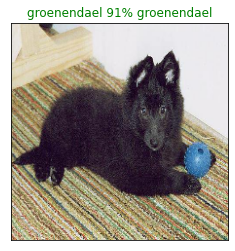

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

let's view our model top 10 predictions

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring thr true label green


In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 predicition confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup the plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels= top_10_pred_labels,
             rotation = "vertical")
  # Change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


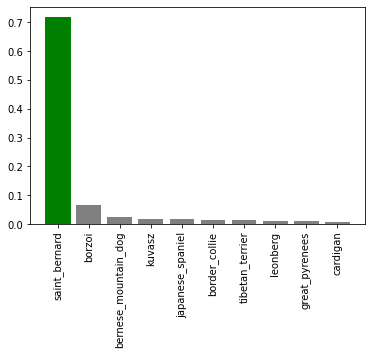

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=8)

Now we've got some function to help us visualize our predictions and evaluate our model, let's check out:


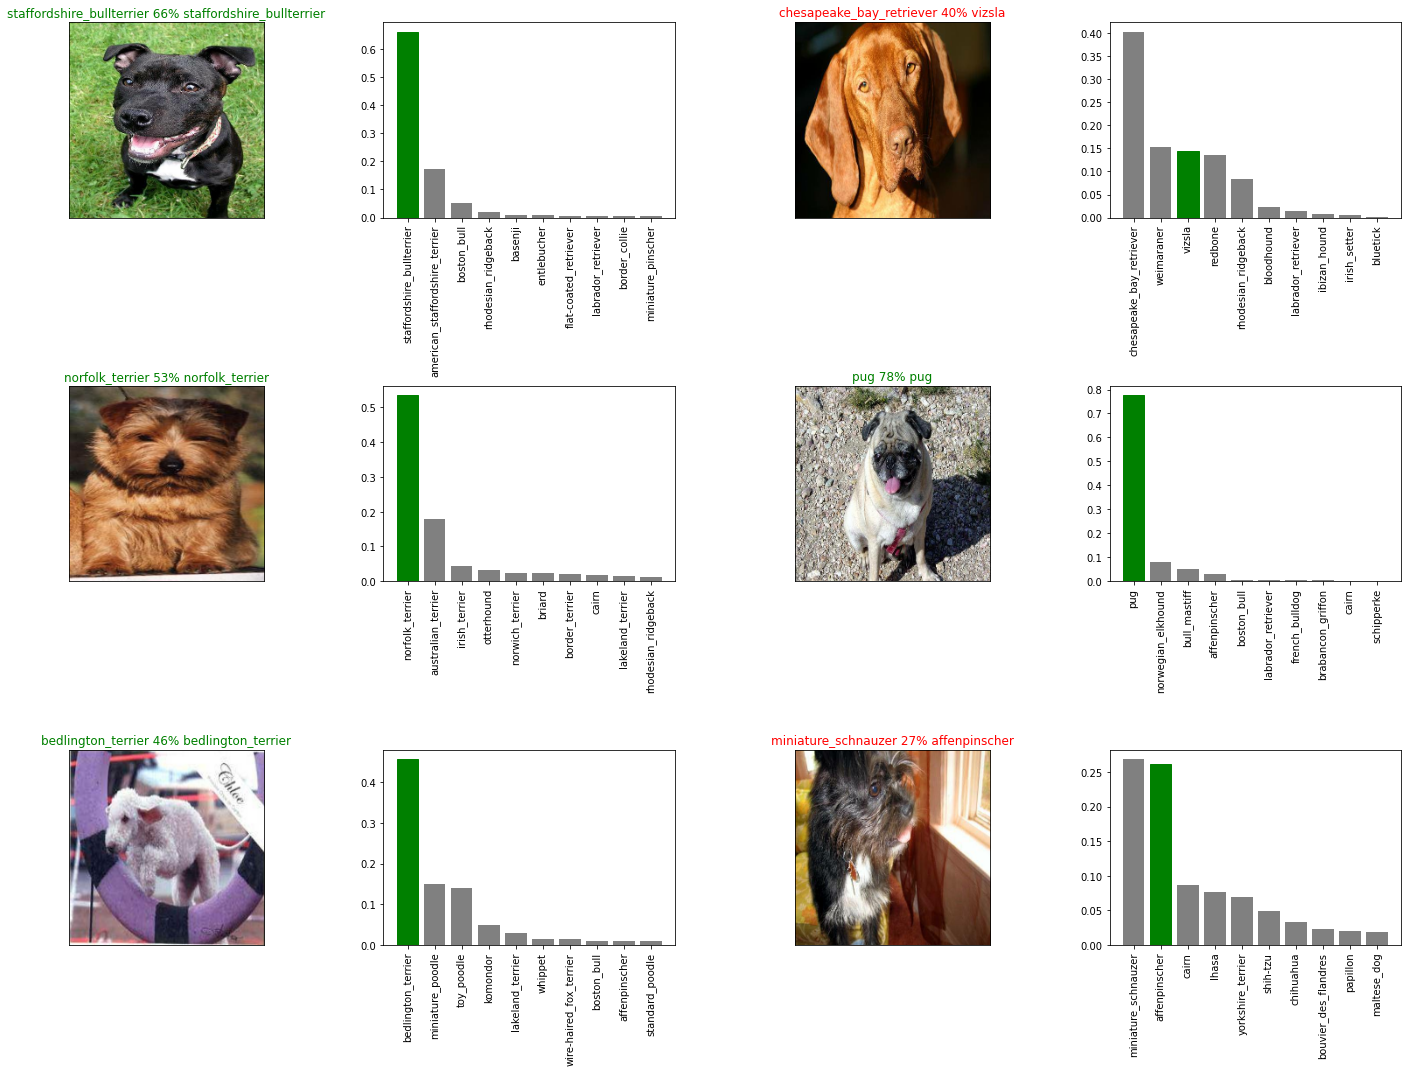

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 50
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model


In [ ]:
# Create a functin to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string)
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog Breed Classification/model",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}")
  model.save(model_path)
  return model_path


In [ ]:
# create a function to load a trained model
def load_model(model_path):
  """
  Loads a model from aspecified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-adam")

Saving model to: /content/drive/MyDrive/Dog Breed Classification/model/20211027-01101635297038-1000-images-mobilenetv2-adam.h5


'/content/drive/MyDrive/Dog Breed Classification/model/20211027-01101635297038-1000-images-mobilenetv2-adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model("/content/drive/MyDrive/Dog Breed Classification/model/20210922-02231632277388-1000-images-mobilenetv2-adam.h5")

Loading saved model from: /content/drive/MyDrive/Dog Breed Classification/model/20210922-02231632277388-1000-images-mobilenetv2-adam.h5


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 108ms/step - loss: 1.2552 - accuracy: 0.6600


[1.2551789283752441, 0.6600000262260437]

In [ ]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 115ms/step - loss: 1.2961 - accuracy: 0.6600


[1.2961081266403198, 0.6600000262260437]

Training FUll DATA

In [ ]:
len(x), len(y)

(10222, 10222)

In [ ]:
full_data = create_data_batches(x, y)

Creating training data batches..


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tenserboard_callback()
# No validation set when training on all data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# fit the model
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 923s 3s/step - loss: 1.3442 - accuracy: 0.6665
Epoch 2/100
320/320 [==============================] - 41s 127ms/step - loss: 0.3991 - accuracy: 0.8832
Epoch 3/100
320/320 [==============================] - 41s 126ms/step - loss: 0.2405 - accuracy: 0.9364
Epoch 4/100
320/320 [==============================] - 40s 126ms/step - loss: 0.1556 - accuracy: 0.9631
Epoch 5/100
320/320 [==============================] - 40s 126ms/step - loss: 0.1088 - accuracy: 0.9766
Epoch 6/100
320/320 [==============================] - 41s 127ms/step - loss: 0.0784 - accuracy: 0.9863
Epoch 7/100
320/320 [==============================] - 40s 126ms/step - loss: 0.0582 - accuracy: 0.9921
Epoch 8/100
320/320 [==============================] - 40s 126ms/step - loss: 0.0462 - accuracy: 0.9942
Epoch 9/100
320/320 [==============================] - 41s 127ms/step - loss: 0.0373 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 41s 127ms/

In [ ]:
save_model(full_model, suffix="Full-image-set-mobilenetv2-adam")

Saving model to: /content/drive/MyDrive/Dog Breed Classification/model/20211027-01581635299901-Full-image-set-mobilenetv2-adam.h5


'/content/drive/MyDrive/Dog Breed Classification/model/20211027-01581635299901-Full-image-set-mobilenetv2-adam.h5'

In [ ]:
loaded_full_model = load_model("/content/drive/MyDrive/Dog Breed Classification/model/20210922-04521632286353-Full-image-set-mobilenetv2-adam.h5")

Loading saved model from: /content/drive/MyDrive/Dog Breed Classification/model/20210922-04521632286353-Full-image-set-mobilenetv2-adam.h5


## Making predictions with test dataset
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames. ✅
* Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels). ✅
* Make a predictions array by passing the test batches to the predict() method called on our model

In [ ]:
# Load test image filenames
test_path = ("drive/MyDrive/Dog Breed Classification/test/")
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Breed Classification/test/e218c0da622fedc975a97999ad7d48a5.jpg',
 'drive/MyDrive/Dog Breed Classification/test/dff4932a639f0bf9b1e693fff89fc898.jpg',
 'drive/MyDrive/Dog Breed Classification/test/e648a16d81b6441658b77bca0f1be4ee.jpg',
 'drive/MyDrive/Dog Breed Classification/test/e6b1859592468c8ffc1a73f87b201ba7.jpg',
 'drive/MyDrive/Dog Breed Classification/test/e12168553b1e0b5e56d5ab6ac8a58984.jpg',
 'drive/MyDrive/Dog Breed Classification/test/e2f853c8345758faf5d9b2075f196fd3.jpg',
 'drive/MyDrive/Dog Breed Classification/test/e29f03a924c493b29d17877204dd0205.jpg',
 'drive/MyDrive/Dog Breed Classification/test/e57820007fcc2a07a5230177965a0f59.jpg',
 'drive/MyDrive/Dog Breed Classification/test/e5942b2259c795541cd9ea68fb106406.jpg',
 'drive/MyDrive/Dog Breed Classification/test/e57fded38af2f081403feefb324ed3a9.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches..


In [ ]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# Make predictions on test data using the loaded full model
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 1157s 4s/step


In [ ]:
# Save predictions to csv file (for access later)
np.savetxt("drive/MyDrive/Dog Breed Classification/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
# Load predictions (NumPy array) from csv file
# test_predictions = np.loadtxt("drive/MyDrive/Dog Breed Classification/preds_array.csv", delimiter=",")

In [ ]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle
Looking at the Kaggle sample submission, we find that it wants our models prediction probaiblity outputs in a DataFrame with an ID and a column for each different dog breed. https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed. ✅
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilites) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
["id"] + list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [ ]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image ID's to predictive dataframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]= test_ids

In [ ]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e218c0da622fedc975a97999ad7d48a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dff4932a639f0bf9b1e693fff89fc898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e648a16d81b6441658b77bca0f1be4ee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e6b1859592468c8ffc1a73f87b201ba7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e12168553b1e0b5e56d5ab6ac8a58984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e218c0da622fedc975a97999ad7d48a5,4.16665e-09,3.63486e-11,8.44886e-12,4.5457e-15,3.73903e-09,2.09834e-14,7.09157e-08,6.70927e-10,7.42329e-11,3.64018e-10,4.40451e-12,2.08851e-08,1.21928e-09,1.77057e-10,1.50749e-13,5.64761e-10,3.71457e-11,1.40942e-10,7.81701e-11,1.68789e-12,5.60886e-13,2.34966e-08,8.82017e-12,2.67735e-11,4.4055e-12,2.04373e-11,4.79168e-08,1.26068e-11,1.91182e-11,3.44836e-09,1.32611e-11,7.00109e-12,7.46913e-12,3.78094e-12,2.25053e-12,3.73595e-10,3.20963e-13,1.26191e-13,5.37919e-12,...,4.12447e-13,3.24386e-12,4.16935e-10,2.60181e-10,2.20439e-08,5.68102e-08,5.42979e-11,8.13423e-06,2.17751e-11,6.1757e-09,1.1302e-10,4.42801e-13,1.77477e-14,3.8509e-11,1.44291e-10,1.29233e-10,1.11011e-10,3.87754e-12,9.24144e-09,2.94915e-11,2.01164e-07,4.1176e-11,2.82243e-10,6.608e-09,9.22338e-11,7.78763e-12,3.13969e-11,3.39776e-11,8.14954e-12,1.49624e-08,0.000290051,9.4644e-09,2.52631e-09,1.1387e-10,6.97557e-11,1.64925e-11,5.46885e-07,1.15782e-13,4.70576e-11,4.84911e-05
1,dff4932a639f0bf9b1e693fff89fc898,0.110854,8.51969e-07,2.27579e-06,8.70066e-08,5.71375e-09,7.82451e-06,3.6543e-09,1.05856e-08,2.77419e-08,9.75643e-10,5.29752e-08,7.18177e-07,5.79546e-08,6.53315e-08,2.91701e-09,6.33343e-08,1.09507e-08,4.76308e-05,2.9466e-06,3.84389e-10,2.38393e-05,6.61657e-10,3.47338e-06,1.83286e-06,1.24382e-07,2.11546e-07,2.97627e-05,6.54393e-09,2.80196e-10,4.48917e-09,1.20468e-09,1.50194e-08,8.17665e-06,4.78317e-09,1.96486e-08,4.76127e-05,2.48253e-07,8.68779e-08,6.14832e-08,...,1.90093e-07,7.33333e-08,1.98741e-08,3.55695e-07,6.56122e-08,2.07059e-07,1.0918e-09,4.0079e-10,4.36873e-06,7.44071e-08,2.75613e-09,3.80796e-07,3.29374e-08,1.9023e-07,6.78167e-08,2.8611e-05,0.00159582,3.03477e-06,1.79995e-05,1.49937e-10,1.39901e-07,1.72254e-09,1.71471e-05,0.000453127,1.07244e-06,1.88435e-10,0.0217808,1.66888e-06,2.79709e-06,0.0538873,4.03059e-05,7.29997e-10,2.71335e-08,1.94064e-08,3.13513e-09,1.05494e-08,2.98834e-07,3.4597e-07,3.76501e-07,2.6076e-05
2,e648a16d81b6441658b77bca0f1be4ee,6.36828e-12,2.42573e-12,3.92013e-07,6.93467e-13,5.82887e-11,6.56082e-10,5.34584e-11,1.47697e-07,2.02381e-10,3.30613e-09,1.78103e-08,4.06401e-14,3.37851e-09,1.87091e-10,9.8896e-09,2.22934e-10,6.6485e-13,3.03903e-08,1.81104e-09,7.19658e-09,6.10984e-11,5.06543e-10,1.08212e-09,5.10679e-10,1.47875e-11,3.51159e-09,1.79182e-09,1.0637e-11,7.94433e-10,5.63447e-08,1.92516e-11,1.22186e-11,2.36765e-11,3.35796e-11,4.86045e-10,1.68028e-12,1.69494e-06,0.99991,5.62498e-09,...,1.91144e-10,1.04089e-09,8.84175e-12,1.74964e-11,1.43471e-09,1.86386e-13,2.63549e-09,1.63723e-13,4.27774e-09,5.05459e-09,5.32e-08,4.54401e-11,2.29819e-10,1.13667e-07,1.26297e-09,1.63754e-12,1.60081e-08,6.86434e-11,1.31783e-09,4.90252e-11,7.89727e-10,1.54829e-07,1.61772e-09,5.56044e-10,6.8212e-09,1.04714e-11,6.18901e-11,2.59202e-11,1.51596e-10,4.47739e-11,3.23638e-10,2.498e-08,1.291e-12,6.41287e-11,1.61381e-09,2.32583e-11,1.80255e-09,3.6573e

In [ ]:
preds_df.to_csv("drive/MyDrive/Dog Breed Classification/full_model_predictions_submission_mobilenetV2.csv",
                index=False)

## Making predictions on custom images
to make predictions on custom images, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images

In [ ]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/Dog Breed Classification/dog_pics/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['/content/drive/MyDrive/Dog Breed Classification/dog_pics/images (2).jfif',
 '/content/drive/MyDrive/Dog Breed Classification/dog_pics/images (1).jfif',
 '/content/drive/MyDrive/Dog Breed Classification/dog_pics/images.jfif']

In [ ]:
# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches..


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels


['pomeranian', 'great_dane', 'black-and-tan_coonhound']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

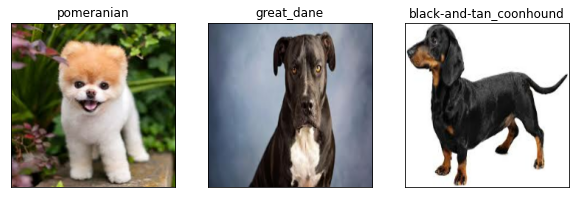

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)